In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
import seaborn as sns
#importing the custome data handler
from data_handler.data_handler import DataHandler
from grid_search import *
from bayes_search import *



In [28]:
class LogisticRegressionClassifier:
    def __init__(self,c=0.1,penalty="l1",solver="saga"):
        self.data_handler = DataHandler()
        self.c=c
        self.penalty=penalty
        self.solver=solver
        self.model=LogisticRegression(random_state=42,solver=self.solver,C=self.c,penalty=self.penalty,max_iter=701)
    #loads the training data from the data handler as features and targets from the cleaned training data
    def load_train_data(self):
        print("Splitting training data into features and target variables")
        self.train_features,self.train_targets = self.data_handler.split_data(self.data_handler.train_data)
    
    #loads the validation data from the data handler as features and targets from the cleaned validation data
    def load_validation_data(self):
        print("Splitting validation data into features and target variables")
        self.validation_features,self.validation_targets = self.data_handler.split_data(self.data_handler.validation_data)
    
    #loads the test data from the data handler as features and targets from the cleaned test data
    def load_test_data(self):
        print("Splitting testing data into features and target variables")
        self.test_features,self.test_targets = self.data_handler.split_data(self.data_handler.test_data)
    
    #trains the model on the training data
    def train(self):
        print("Training the model with training data set")
        self.model.fit(self.train_features,self.train_targets)
    
    #predict the target for given features and returns the predicted targets use to predict the test data
    def predict(self,features):
        print("Predicting target varaibles using the features provided")
        return self.model.predict(features)
    
    #evaluates the model on the validation data
    def evaluate(self,DataFlag="Validation"):
        print("Evaluating the model's performance for {} dataset".format(DataFlag))
        if DataFlag=="Validation":
            features = self.validation_features
            targets = self.validation_targets
        elif DataFlag=="Test":
            features = self.test_features
            targets = self.test_targets
        predictions = self.predict(features)
        print("Accuracy: ",accuracy_score(targets,predictions))
        print("Classification Report: \n",classification_report(targets,predictions))
        print("Confusion Matrix: \n",confusion_matrix(targets,predictions))
        print("Roc Score : ",roc_auc_score(targets,predictions))
        self.plot_confusion_matrix(targets,predictions,DataFlag)
    

    #plot confusion matrix
    def plot_confusion_matrix(self,targets,predictions,dataFlag):
        cm = confusion_matrix(targets, predictions) 
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for {} data".format(dataFlag))
        plt.show()
    

In [29]:
lr=LogisticRegressionClassifier()
lr.load_train_data()
lr.load_test_data()
lr.load_validation_data()

Splitting training data into features and target variables
Splitting testing data into features and target variables
Splitting validation data into features and target variables


In [30]:
lr.train()

Training the model with training data set


Evaluating the model's performance for Validation dataset
Predicting target varaibles using the features provided
Accuracy:  0.8089887640449438
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        58
           1       0.72      0.74      0.73        31

    accuracy                           0.81        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.81      0.81      0.81        89

Confusion Matrix: 
 [[49  9]
 [ 8 23]]
Roc Score :  0.7933815350389322


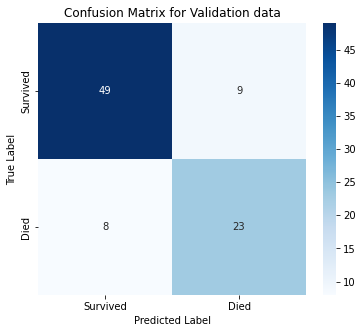

In [31]:
lr.evaluate(DataFlag="Validation")

Evaluating the model's performance for Test dataset
Predicting target varaibles using the features provided
Accuracy:  0.7865168539325843
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.74      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

Confusion Matrix: 
 [[92 17]
 [21 48]]
Roc Score :  0.769844435580375


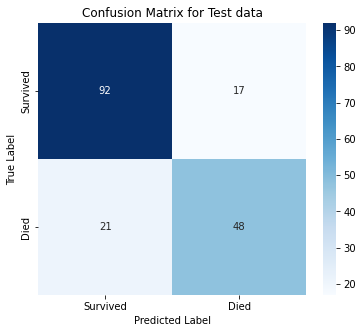

In [32]:
lr.evaluate(DataFlag="Test")

In [33]:
gs=GridSearch()
gs.tune_logistic_regression(lr.model,lr.validation_features,lr.validation_targets)

Best Parameters: {'C': 10, 'max_iter': 700, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Val Score: 0.807843137254902


({'C': 10, 'max_iter': 700, 'penalty': 'l2', 'solver': 'liblinear'},
 0.807843137254902)

In [34]:
bs=BayesianSearch(n_iter=50)
bs.tune_logistic_regression(lr.model,lr.validation_features,lr.validation_targets)

Best Params: OrderedDict([('C', 0.3111875105434535), ('max_iter', 500), ('penalty', 'l1'), ('solver', 'liblinear')])
Best Validation Accuracy: 0.8196078431372549


(OrderedDict([('C', 0.3111875105434535),
              ('max_iter', 500),
              ('penalty', 'l1'),
              ('solver', 'liblinear')]),
 0.8196078431372549)

In [35]:
lr_optimized=LogisticRegressionClassifier(c=0.3111875105434535,penalty="l1",solver="liblinear")
lr_optimized.load_train_data()
lr_optimized.load_validation_data()
lr_optimized.load_test_data()


Splitting training data into features and target variables
Splitting validation data into features and target variables
Splitting testing data into features and target variables


In [36]:
lr_optimized.train()

Training the model with training data set


Evaluating the model's performance for Validation dataset
Predicting target varaibles using the features provided
Accuracy:  0.8426966292134831
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        58
           1       0.74      0.84      0.79        31

    accuracy                           0.84        89
   macro avg       0.83      0.84      0.83        89
weighted avg       0.85      0.84      0.84        89

Confusion Matrix: 
 [[49  9]
 [ 5 26]]
Roc Score :  0.8417686318131258


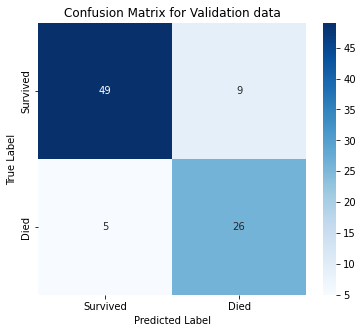

In [37]:
lr_optimized.evaluate(DataFlag="Validation")

Evaluating the model's performance for Test dataset
Predicting target varaibles using the features provided
Accuracy:  0.797752808988764
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix: 
 [[92 17]
 [19 50]]
Roc Score :  0.7843371892035634


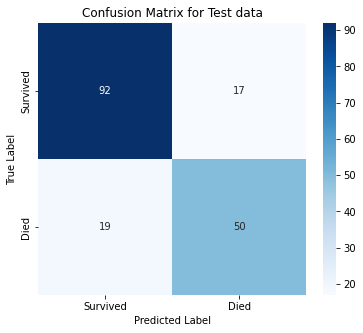

In [38]:
lr_optimized.evaluate(DataFlag="Test")